In [1]:
import pickle

with open("/home/students/innes/ba2/LLM-aspect/img/probs2.pkl", 'rb') as f:
        dp_of_prefixes = pickle.load(f)

In [2]:
print(dp_of_prefixes['из'])

[[0.00016337883425876498, 0.024758601561188698, 0.001991071505472064, 0.0381479412317276, 0.1991146057844162], [0.00032592559000477195, 0.04940206557512283, 0.0001434734876966104, 0.02403930202126503, 0.04818803444504738], [0.0008151826914399862, 0.0009623118094168603, 0.00026836220058612525, 0.004379748832434416, 0.28461045026779175], [2.808932367770467e-05, 0.012879947200417519, 0.032180022448301315, 0.023042870685458183, 0.014620457775890827], [0.000554323079995811, 0.043691135942935944, 0.0005015528295189142, 0.008541817776858807, 0.006591353565454483], [0.0006203163065947592, 0.010503530502319336, 0.0012150835245847702, 0.01816757582128048, 0.02401362732052803], [0.00010170671885134652, 0.0931701511144638, 0.00028268026653677225, 0.017081651836633682, 0.017762664705514908], [0.0005478211678564548, 0.0004889120464213192, 0.000883616681676358, 0.000642266939394176, 0.16543565690517426], [8.75117038958706e-05, 0.004443395417183638, 0.15567871928215027, 0.09419093281030655, 0.00070659

In [3]:
import numpy as np
ru_prefixes = ['по', 'на', 'при', 'у', 'в', 'вы', 'за', 'под', 'про', 'с', 'раз', 'из', 'об', 'от', 'пере', 'до', 'над', 'недо', "no-prefix"]
en_prefixes = ['po', 'na', 'pri', 'u', 'v', 'vy', 'za', 'pod', 'pro', 's', 'raz', 'iz', 'ob', 'ot', 'pere', 'do', 'nad', 'nedo', 'no prefix']
averaged_dp_of_prefixes = {}
for en_prefix, ru_prefix in zip(en_prefixes, ru_prefixes):
    sample_size = len(dp_of_prefixes[ru_prefix])
    if sample_size != 0:
        summed = np.sum(dp_of_prefixes[ru_prefix], axis=0)
        averaged = [i/sample_size for i in summed]
        print(en_prefix, averaged, sample_size)
        averaged_dp_of_prefixes[ru_prefix] = (averaged, sample_size)

po [0.03365475000394834, 0.05139579585323435, 0.061509443637694755, 0.0660652017848826, 0.09849589985129971] 416
na [0.042099716442832266, 0.043999797855089645, 0.0774276341513169, 0.0733660507660064, 0.08096333238059084] 254
pri [0.009422996653958945, 0.07973435148959859, 0.037426846016240085, 0.07530461346952408, 0.1327689446959179] 259
u [0.013068055300871696, 0.08390796177182712, 0.08971064668834774, 0.06609018506530513, 0.08629930445981113] 287
v [0.02446552496657835, 0.09917272220943567, 0.08178182378718415, 0.07111593145983582, 0.07655663332140025] 228
vy [0.012896268924281829, 0.06436597342639125, 0.05382965547566906, 0.11188169743653499, 0.11512956163054634] 178
za [0.045722980546438315, 0.05238818892290892, 0.07112079082685996, 0.08164897880284236, 0.09478716140977296] 243
pod [0.043815410803254344, 0.09118450310187842, 0.0753485260117616, 0.13291939872763736, 0.03836794747881608] 126
pro [0.01032876758006907, 0.05626304204487233, 0.11052571944192975, 0.08640151148817192, 0.0

In [22]:
import matplotlib.pyplot as plt
# Define labels for the aspects
labels = ["state", "habitual", "activity", "endeavor", "performance"]

# Create bar graphs for each prefix
# for prefix, (probabilities, sample_size) in averaged_dp_of_prefixes.items():
#     plt.figure(figsize=(10, 5))
#     plt.bar(labels, probabilities, color='skyblue')
#     plt.xlabel('Aspect Labels')
#     plt.ylabel('Probability')
#     plt.title(f'Prefix: {prefix} (Sample Size: {sample_size})')
#     plt.ylim(0, 1)  # Probability range from 0 to 1
#     plt.show()

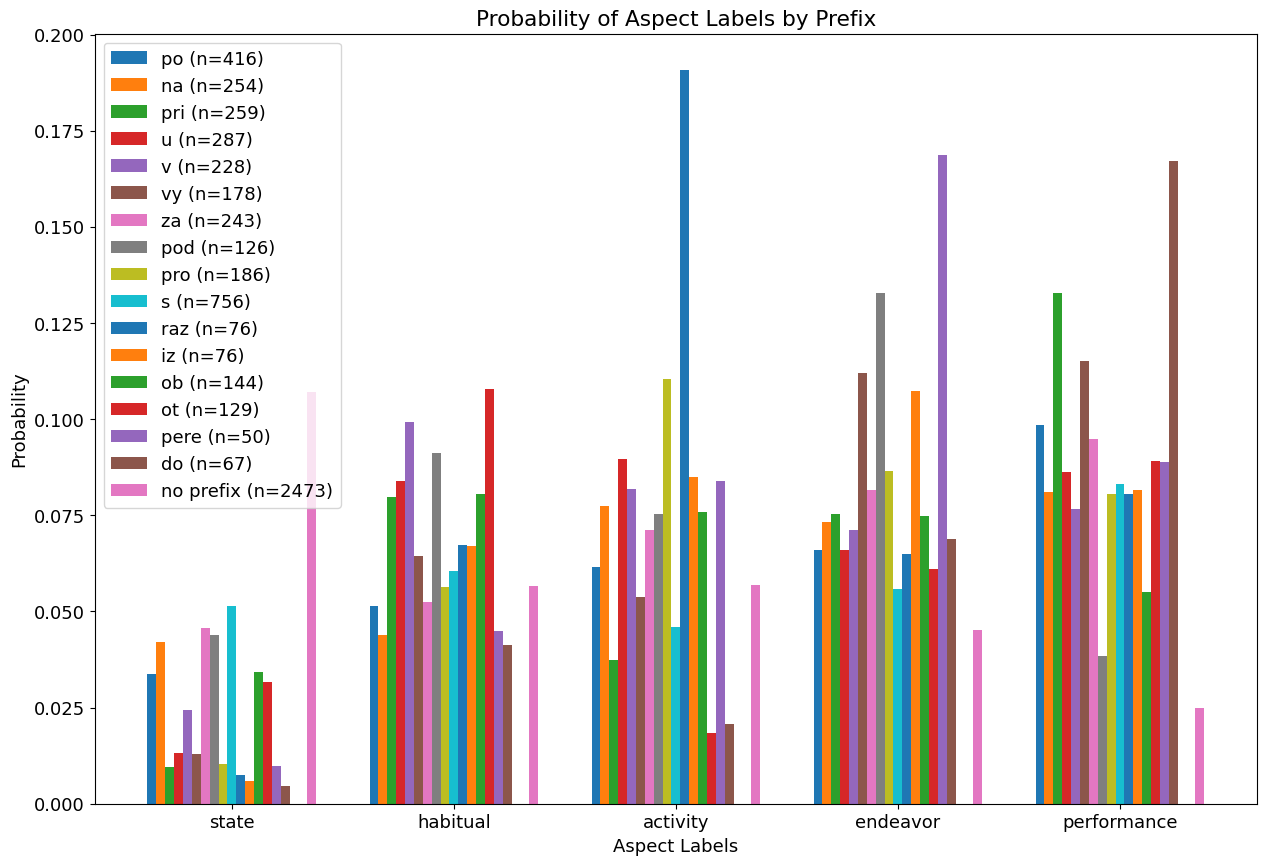

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define labels for the aspects
labels = ["state", "habitual", "activity", "endeavor", "performance"]
num_labels = len(labels)

# Define the position of each group of bars
x = np.arange(num_labels)

# Set width of bar
bar_width = 0.04

# Create a large plot
plt.figure(figsize=(15, 10))

plt.rcParams.update({'font.size': 13})

# Plot each prefix's data as a bar graph
for i, (prefix, (probabilities, sample_size)) in enumerate(averaged_dp_of_prefixes.items()):
    if sample_size > 30:
        if isinstance(probabilities, list) and all(isinstance(j, (int, float)) for j in probabilities):
            if prefix == "no-prefix":
                prefix = "no prefix"
            plt.bar(x + i * bar_width, probabilities, width=bar_width, label=f'{en_prefixes[i]} (n={sample_size})')

# Add labels, title, and legend
plt.xlabel('Aspect Labels')
plt.ylabel('Probability')
plt.title('Probability of Aspect Labels by Prefix')
plt.xticks(x + (len(averaged_dp_of_prefixes.items()) - 1) * bar_width / 2, labels)
plt.legend()
plt.savefig("/home/students/innes/ba2/LLM-aspect/img/ru_prefixes.png", dpi=300)

# Show the plot
plt.show()


In [8]:
from scipy import stats

with_prefix = []
for prefix in ru_prefixes:
    if prefix != "no-prefix":
        with_prefix += dp_of_prefixes[prefix]

t_stat, p_value = stats.ttest_ind(dp_of_prefixes["про"], dp_of_prefixes["пере"])
#t_stat, p_value = stats.ttest_ind(with_prefix, dp_of_prefixes["no-prefix"])


print(t_stat, p_value)


[ 0.07488668  0.50683794  0.84185118 -2.50007401 -0.42564704] [0.94036886 0.6127458  0.4007308  0.01310253 0.67075628]


In [7]:
print(len(dp_of_prefixes["no-prefix"]))
# get mean standard deviation
print(np.mean(dp_of_prefixes["no-prefix"], axis=0))
print(np.std(dp_of_prefixes["no-prefix"], axis=0))

print(len(with_prefix))
# get mean standard deviation
print(np.mean(with_prefix, axis=0))
print(np.std(with_prefix, axis=0))

2473
[0.1070448  0.05656412 0.05697122 0.04529263 0.02478978]
[0.12373615 0.15675673 0.16934812 0.11666401 0.0715514 ]
3489
[0.03103417 0.06681483 0.06652628 0.07480405 0.08933645]
[0.07486421 0.16505891 0.1748518  0.16088596 0.14263351]
